In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import astropy.io.fits as afits

In [3]:
import glob

In [9]:
fits = glob.glob('*.fits')

In [17]:
data=[]
for fit in fits:
    print(fit[37])
    data.append(afits.open(fit)[0].data)

y
i
z
g
r


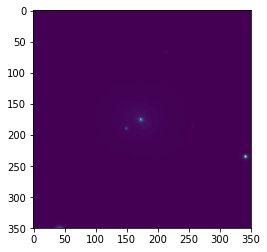

In [21]:
imshow(data[1])